In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score, 
    confusion_matrix, 
    classification_report,
    roc_curve,
    auc
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE

### <b>Загрузка датасета:</b>

In [2]:
df = pd.read_csv("ТИУ Бакалавриат Абитуриенты Processed.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head(5)

,year,gender,gpa,points,result,direction_01.03.02 Прикладная математика и информатика,direction_02.03.01 Математика и компьютерные науки,direction_05.03.01 Геология,direction_08.03.01 Строительство,direction_08.05.00 Техника и технологии строительства,...,direction_27.03.02 Управление качеством,direction_27.03.03 Системный анализ и управление,direction_27.03.04 Управление в технических системах,direction_27.03.05 Инноватика,direction_28.03.03 Наноматериалы,direction_41.03.06 Публичная политика и социальные науки,direction_43.03.00 Сервис и туризм,direction_43.03.01 Сервис,direction_43.03.03 Гостиничное дело,direction_45.03.04 Интеллектуальные системы в гуманитарной сфере
0,0,1,3.733,173.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,3.314,148.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,4.333,196.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4.667,222.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,4.667,220.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <b>Подготовка данных перед обучением:</b>

Разделение на входные и выходные данные:

In [3]:
X = df.drop("result", axis=1)
y = df["result"]

In [4]:
print(X.shape)
print(y.shape)

(21757, 50)
(21757,)


In [5]:
y.value_counts()

result
0    13595
1     8162
Name: count, dtype: int64

Решение проблемы дисбаланса классов путём генерации синтетических данных<br>для минорного класса:

In [6]:
smote = SMOTE()
X_resempled, y_resampled = smote.fit_resample(X, y)

In [7]:
print(X_resempled.shape)
print(y_resampled.shape)

(27190, 50)
(27190,)


In [8]:
y_resampled.value_counts()

result
0    13595
1    13595
Name: count, dtype: int64

Разделение на тренировочную и тестовую выборку:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resempled, y_resampled,
    test_size=0.2, 
    random_state=42
)

Масштабирование входных данных:

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
joblib.dump(scaler, "standard_scaler.joblib")

['standard_scaler.joblib']

### <b>Обучение <i>ML</i> модели:</b>

In [12]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Получение классификации для тестовой выборки:

In [13]:
y_pred = model.predict(X_test)

In [14]:
y_scores = model.predict_proba(X_test)[:, 1]

Метрики качества обучения:

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))
print("ROC AUC Score:", roc_auc_score(y_test, y_scores))

Accuracy: 0.8214417065097462
Precision: 0.8215199823043928
Recall: 0.8214671413576307
F1 score: 0.8214373046129644
ROC AUC Score: 0.9057328131932346


Classification report:

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2728
           1       0.82      0.83      0.82      2710

    accuracy                           0.82      5438
   macro avg       0.82      0.82      0.82      5438
weighted avg       0.82      0.82      0.82      5438



Confusiom matrix:

<Figure size 500x500 with 0 Axes>

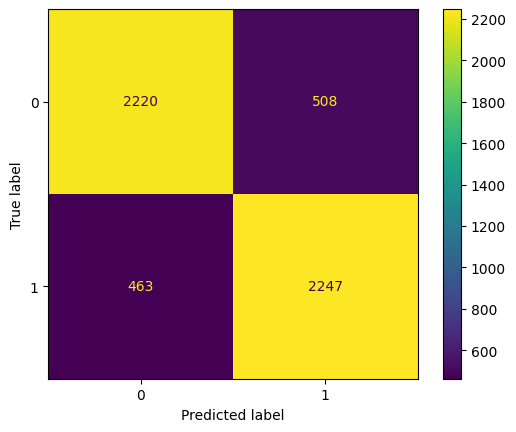

In [17]:
plt.figure(figsize=(5, 5))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
display.plot()
plt.show()

График ROC - кривой:

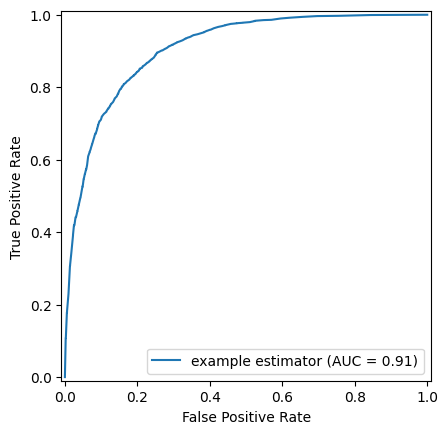

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, 
    tpr=tpr, 
    roc_auc=roc_auc,
    estimator_name='example estimator'
)
display.plot()
plt.show()

Сохранение обученной <i>ML</i> модели:

In [20]:
joblib.dump(model, "model.joblib")

['model.joblib']

In [21]:
joblib.dump(model, "model_compressed.joblib", compress=9)

['model_compressed.joblib']